What best values of (a,b,c) and (k,beta) did you find? How did you find them -
What method did you use?

Compare values in different corpus. Are they different?
Quantify difference functions. constant function, typical values for Heaps law

In [64]:
import pandas as pd
import os
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_names = {"word_counts_novels_clean.txt", 
            "word_counts_news_clean.txt",
            "word_counts_arxiv_abs_clean.txt"}

In [2]:
data = {}

for name in dataset_names:
    data_path = os.path.join(os.getcwd(), "data", name)

    # Assuming your data is in a CSV file with 'word' and 'count' columns
    data[name] = pd.read_csv(data_path, names=['count', 'word'])

In [67]:
n = len(data)
sparce = 100

types_dict = dict()

for i in range(0, n, sparce):
    m = data.sample(n = i+1, weights="count",replace=True, random_state=123)
    types_dict[i+1] = len(set(m.word))

n_types = np.array([key for key in types_dict.keys()])
n_words = np.array([key for key in types_dict.values()])

In [116]:
def Heaps_law(n_words, k, beta):
    return k * n_words ** beta

In [111]:
params = curve_fit(Heaps_law, n_words, n_types, bounds = (0, [np.inf, 1]))
fits, covar = params
k, beta = fits
print("k=", k, "B=",beta)

# approximate the error of the fit
sigma_ab = np.sqrt(np.diagonal(covar))

k= 5.554385054754728 B= 0.9999999999999604


AttributeError: PolyCollection.set() got an unexpected keyword argument 'scale'

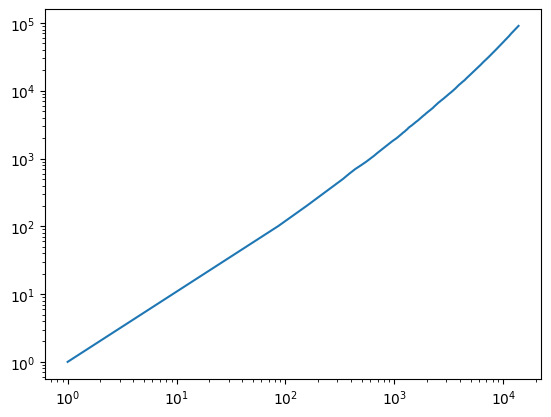

In [130]:
plt.loglog(n_words, n_types, label = "news_corpora")

n_words_ref = np.linspace(0, n, sparce)

bound_upper = Heaps_law(n_words, *(fits + sigma_ab))
bound_lower = Heaps_law(n_words, *(fits - sigma_ab))

# plotting the confidence intervals
plt.fill_between(n_words, bound_lower, bound_upper,
                 color = 'black', alpha = 0.15)

plt.loglog(n_words_ref, n_words_ref, label = "reference")
plt.legend()

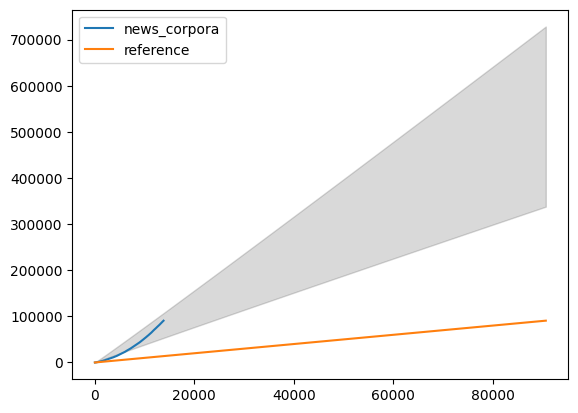

In [125]:
plt.plot(n_words, n_types, label = "news_corpora")

n_words_ref = np.linspace(0, n, sparce)

bound_upper = Heaps_law(n_words_ref, *(fits + sigma_ab))
bound_lower = Heaps_law(n_words_ref, *(fits - sigma_ab))

# plotting the confidence intervals
plt.fill_between(n_words_ref, bound_lower, bound_upper,
                 color = 'black', alpha = 0.15)

plt.plot(n_words_ref, n_words_ref, label = "reference")
plt.legend()

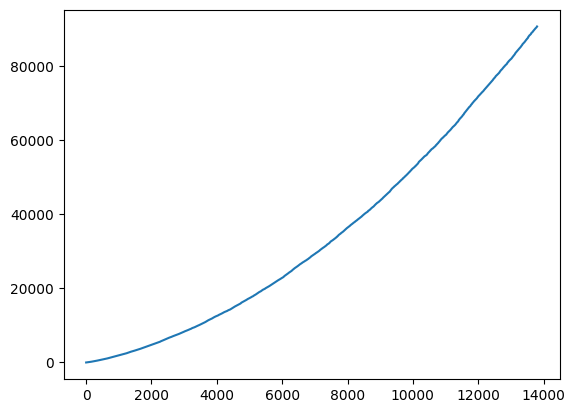

In [91]:
plt.plot(n_words, n_types)